<a href="https://colab.research.google.com/github/edwinnglabs/timeseries-notebooks/blob/main/orbit_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install orbit-ml
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

### orbit-ml hello world
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [5]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-sparkles.json')[:20]

In [7]:
import orbit
print(orbit.__version__)

1.1.0


In [101]:
from orbit.models import LGT
import pandas as pd 
import numpy as np
import datetime 

def orbit_lgt_next(ys:[float])->float:
  """ Predict the next point in a series """

  df = pd.DataFrame(columns=['y'],data=ys)
  # log transform is recommended usually
  df['y'] = np.log1p(df['y'])

  df['ds'] = pd.date_range(start='2021-01-01', periods=len(ys), freq='D')
  lgt = LGT(response_col='y', date_col='ds', estimator='stan-map', seed=2022)
  lgt.fit(df)

  df = pd.DataFrame(columns=['y'],data=YS)
  df['ds'] = pd.date_range(start='2021-01-01', periods=len(YS), freq='D')
  future_df = df.loc[(df.shape[0] - 1):, ['ds']].reset_index(drop=True)
  future_df['ds'] = future_df['ds'] + pd.Timedelta(1, unit="D")
    
  forecast_df = lgt.predict(future)
  prediction = np.expm1(forecast_df['prediction'].values[0])
  prediction = np.clip(prediction, a_min=0, a_max=np.inf)

  return prediction
   
def run(ys):
  """ Slow, see river package or others if you don't like """
  burnin = 10
  y_hats = list()
  for t in range(len(ys)):
     if t>burnin:
        y_hat = orbit_lgt_next(ys[:t])
     elif t>=1:
        y_hat = ys[t-1]
     else:
        y_hat = 0 
     y_hats.append(y_hat)
  return y_hats 

In [102]:
XS = run(YS)

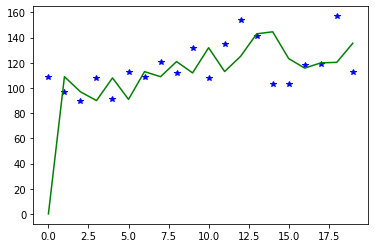

In [103]:
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(XS[:25],'g')